In [12]:
!ls

drive  sample_data


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf



In [15]:
root_path = "/content/drive/MyDrive/Colab Notebooks/Coloring-greyscale-images-master/Alpha-version/"

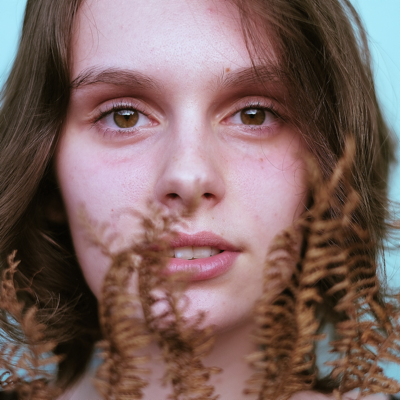

In [16]:
load_img(root_path + 'woman.jpg')

In [ ]:
# Get images
image = img_to_array(load_img(root_path + 'woman.jpg'))
image = np.array(image, dtype=float)

In [17]:
image.shape

(400, 400, 3)

In [18]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]


In [22]:
rgb2lab(1.0/255*image)[:,:,0].shape

(400, 400)

array([[87, 87, 87, ..., 88, 88, 87],
       [87, 87, 87, ..., 88, 87, 88],
       [87, 88, 87, ..., 87, 87, 87],
       ...,
       [ 3,  3,  4, ..., 36, 39, 41],
       [ 3,  3,  4, ..., 28, 31, 32],
       [ 2,  3,  4, ..., 15, 23, 23]], dtype=uint8)
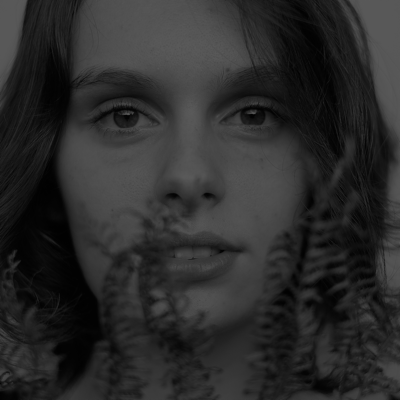

In [19]:
X.astype(np.uint8)

In [24]:
Y.shape

(400, 400, 2)

In [ ]:
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [ ]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(x=X,
    y=Y,
    batch_size=1,
    epochs=1000)

In [ ]:
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab

print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]

cur_rgb = (lab2rgb(cur) * 255).astype(np.uint8)
imsave("img_result.png", cur_rgb)

cur_rgb_gray = (rgb2gray(cur) * 255).astype(np.uint8)
imsave("img_gray_version.png", cur_rgb_gray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.0082e-04
0.0006008177297189832
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[[  0, 252, 249],
        [  0, 248, 246],
        [  0, 245, 243],
        ...,
        [  0, 242, 244],
        [  0, 249, 247],
        [  0, 251, 251]],

       [[  0, 248, 252],
        [  0, 244, 246],
        [  0, 240, 243],
        ...,
        [  0, 248, 244],
        [  0, 247, 240],
        [  0, 239, 242]],

       [[  0, 249, 254],
        [  0, 245, 246],
        [  0, 241, 244],
        ...,
        [  0, 242, 241],
        [  0, 241, 235],
        [  0, 239, 241]],

       ...,

       [[  0,   1,   3],
        [  0,   3,   3],
        [  0,   3,   4],
        ...,
        [  0,   0, 254],
        [  0,   1, 254],
        [  0,   0, 255]],

       [[  0,   1,   4],
        [  0,   4,   3],
        [  0,   4,   5],
        ...,
        [  0,   1, 254],
        [  0,   3, 255],
        [  0,   1,   0]],

       [[  0,   3,   2],
        [  0,   3,   2],
        [  0,   3,   3],
        ...,
        [  0,   0, 255],
        [  0,   1,   0],
        [  0,   1,   0]]], dtype=uint8)
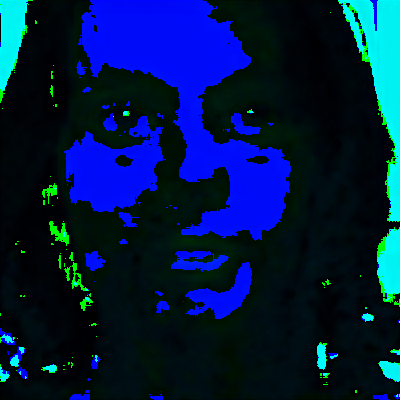

In [ ]:
cur.astype(np.uint8)

array([[14, 11,  9, ...,  7, 12, 14],
       [12,  9,  6, ..., 11, 10,  5],
       [13,  9,  6, ...,  7,  6,  5],
       ...,
       [ 1,  3,  3, ...,  7,  9,  9],
       [ 2,  4,  4, ...,  7,  9,  7],
       [ 3,  3,  3, ...,  3,  5,  5]], dtype=uint8)
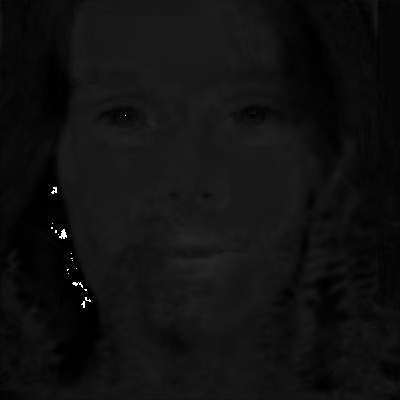

In [ ]:
(rgb2gray(cur)).astype(np.uint8)

In [ ]:
X[0][:,:,0]

array([[87.92151624, 87.5695404 , 87.98095073, ..., 88.27321681,
        88.27321681, 87.92151624],
       [87.5695404 , 87.92151624, 87.95116229, ..., 88.27321681,
        87.92151624, 88.21922686],
       [87.92151624, 88.27321681, 87.92151624, ..., 87.92151624,
        87.92151624, 87.37926362],
       ...,
       [ 3.4114104 ,  3.71407149,  4.05219013, ..., 36.67807131,
        39.9218488 , 41.04215269],
       [ 3.75364515,  3.71407149,  4.07197696, ..., 28.34821411,
        31.95537459, 32.84553536],
       [ 2.8328776 ,  3.39162357,  4.05219013, ..., 15.78370734,
        23.0260858 , 23.0260858 ]])

In [ ]:
output[0].astype(np.uint8)

array([[[252, 251],
        [249, 248],
        [244, 245],
        ...,
        [246, 249],
        [250, 250],
        [252, 253]],

       [[248, 254],
        [244, 248],
        [239, 246],
        ...,
        [252, 249],
        [249, 244],
        [240, 243]],

       [[249, 255],
        [244, 249],
        [240, 247],
        ...,
        [246, 245],
        [244, 238],
        [241, 243]],

       ...,

       [[  1,   2],
        [  3,   2],
        [  4,   4],
        ...,
        [  1, 252],
        [  3, 253],
        [  0, 254]],

       [[  2,   2],
        [  4,   1],
        [  4,   3],
        ...,
        [  2, 253],
        [  5, 254],
        [  1, 254]],

       [[  2,   1],
        [  2,   0],
        [  2,   1],
        ...,
        [  1, 255],
        [  2, 255],
        [  0,   0]]], dtype=uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
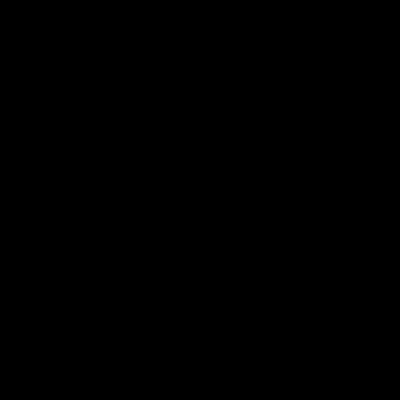

In [ ]:
lab2rgb(cur).astype(np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
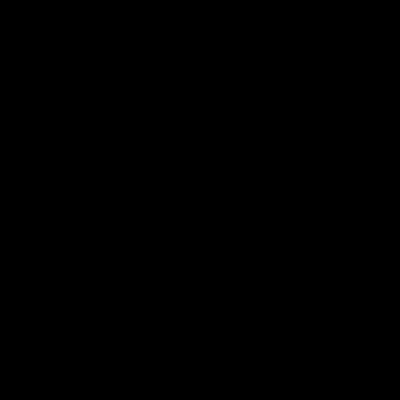

In [ ]:
rgb2gray(lab2rgb(cur)).astype(np.uint8)

In [ ]:
cur.shape

(400, 400, 3)

In [ ]:
print(cur)

[[[ 87.92151624  -4.04351377  -5.0517149 ]
  [ 87.5695404   -7.88583755  -8.70512676]
  [ 87.98095073 -12.69439793 -11.70004654]
  ...
  [ 88.27321681 -10.62561893  -7.84752512]
  [ 88.27321681  -6.42592382  -6.22423935]
  [ 87.92151624  -4.57937241  -3.66187286]]

 [[ 87.5695404   -8.09392738  -2.61402774]
  [ 87.92151624 -12.78064346  -8.72413635]
  [ 87.95116229 -17.56069183 -10.4379034 ]
  ...
  [ 88.27321681  -4.24595261  -7.1682539 ]
  [ 87.92151624  -7.55646896 -12.23999596]
  [ 88.21922686 -16.41684723 -13.54009342]]

 [[ 87.92151624  -7.66473532  -1.09813559]
  [ 88.27321681 -12.47963238  -7.93718576]
  [ 87.92151624 -16.42832756  -9.31677532]
  ...
  [ 87.92151624 -10.76401234 -11.71190357]
  [ 87.92151624 -12.36979961 -18.36883354]
  [ 87.37926362 -15.90426445 -13.66449738]]

 ...

 [[  3.4114104    1.86525583   2.44358754]
  [  3.71407149   3.70737958   2.15519953]
  [  4.05219013   4.08818245   4.19876623]
  ...
  [ 36.67807131   1.02899194  -4.7314887 ]
  [ 39.9218488    